In [2]:
import pandas as pd
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 100)
import seaborn as sns

## Load Data

In [3]:
datadict = pd.read_csv('../data/raw/WiDS Datathon 2020 Dictionary.csv')

In [4]:
train = pd.read_csv('../data/raw/training_v2.csv')

In [7]:
unlabeled = pd.read_csv('../data/raw/unlabeled.csv')

In [6]:
datadict.head()

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
0,identifier,encounter_id,None,integer,Unique identifier associated with a patient un...,None
1,identifier,hospital_id,None,integer,Unique identifier associated with a hospital,None
2,identifier,patient_id,None,integer,Unique identifier associated with a patient,None
3,demographic,hospital_death,None,binary,Whether the patient died during this hospitali...,0
4,demographic,age,Years,numeric,The age of the patient on unit admission,None


## Generate Types

In [11]:
continuous_cols = list(
    list(datadict[datadict['Data Type'] == 'integer']['Variable Name'].unique())
    + list(datadict[datadict['Data Type'] == 'numeric']['Variable Name'].unique())
)
categorical_cols = list(datadict[datadict['Data Type'] == 'string']['Variable Name'].unique())
binary_cols = list(datadict[datadict['Data Type'] == 'binary']['Variable Name'].unique())
target_cols = 'hospital_death'

#continuous_cols.remove(target_cols)

## Unique Categories

In [9]:
datadict['Category'].unique()

array(['identifier', 'demographic', 'APACHE covariate', 'vitals', 'labs',
       'labs blood gas', 'APACHE prediction', 'APACHE comorbidity',
       'APACHE grouping', 'GOSSIS example prediction'], dtype=object)

## Unique Variables

In [10]:
datadict['Variable Name'].unique()

array(['encounter_id', 'hospital_id', 'patient_id', 'hospital_death',
       'age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       'hospital_admit_source', 'icu_admit_source', 'icu_admit_type',
       'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days',
       'readmission_status', 'weight', 'albumin_apache',
       'apache_2_diagnosis', 'apache_3j_diagnosis',
       'apache_post_operative', 'arf_apache', 'bilirubin_apache',
       'bun_apache', 'creatinine_apache', 'fio2_apache',
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache',
       'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache',
       'hematocrit_apache', 'intubated_apache', 'map_apache',
       'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache',
       'resprate_apache', 'sodium_apache', 'temp_apache',
       'urineoutput_apache', 'ventilated_apache', 'wbc_apache',
       'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min',
       'd1_diasbp_max', 'd1_diasbp_mi

## Unique Data Types

In [35]:
datadict['Data Type'].unique()

array(['integer', 'binary', 'numeric', 'string'], dtype=object)

## Unique Units of Measure

In [8]:
datadict['Unit of Measure'].unique()

array(['None', 'Years', 'kilograms/metres^2', 'centimetres', 'Days',
       'kilograms', 'g/L', 'micromol/L', 'mmol/L', 'Fraction',
       'Beats per minute', 'Millimetres of mercury', 'Breaths per minute',
       'Degrees Celsius', 'Millilitres', '10^9/L', 'Percentage', 'g/dL'],
      dtype=object)

## Groupings

### Identifiers

In [13]:
identifier_cols = list(datadict[datadict['Category'] == 'identifier']['Variable Name'].unique())
identifier_cols # drop these from training

['encounter_id', 'hospital_id', 'patient_id']

These are unique entities - they have may have different distributions of data:

In [42]:
train['hospital_id'].unique(), len(train['hospital_id'].unique())

(array([118,  81,  33,  83,  77, 149,  31, 151,  69,  46,  63, 113, 137,
         89, 168, 150, 140,  34,  74, 102,  91, 198, 129,   4, 124,  68,
        138, 174, 134, 169,  57, 177, 155,  85,  78,  95,  98, 105,  76,
          5, 116, 119,  79, 171, 161, 128, 147, 112,  32,  55,  17, 136,
         44, 179,  88,  23, 130,  72, 109,  10, 204, 117, 202,  70, 160,
         62,  16, 199,  54, 100, 186,  20, 107,  14, 132,  87,  53,  21,
         99,  71, 182,  24, 200, 189,  60,  84,  26, 133,  27,   8, 194,
        111, 176, 187,  39, 101,  80,  90,  19,  94,  50, 192,  43, 145,
        180,  40,   9,  93, 185, 159, 166, 157,  64, 125,  92,  13,  37,
        139, 135,  51,  18, 181, 158, 196,  47, 103, 197,  38, 188,   2,
         49, 142,  35,  15, 146,  29,  36, 167,  30, 184, 104, 121, 195,
          3,   6, 183,  66]), 147)

In [41]:
train['icu_id'].unique(), len(train['icu_id'].unique())

(array([ 92,  90,  93,  91,  95, 114, 113, 102,  97, 100,  87,  99, 103,
         83,  85, 109,  82,  98,  89, 108, 120, 143, 133, 136, 160, 126,
        170, 144, 123, 171, 125, 135, 153, 158, 134, 251, 212, 185, 174,
        236, 252, 181, 176, 248, 227, 195, 187, 230, 242, 241, 267, 259,
        290, 273, 261, 307, 285, 286, 256, 302, 417, 337, 404, 408, 377,
        394, 347, 369, 376, 362, 374, 413, 384, 391, 317, 324, 402, 388,
        335, 386, 364, 321, 366, 312, 400, 398, 365, 338, 389, 429, 428,
        426, 430, 424, 427, 431, 432, 425, 434, 451, 464, 445, 470, 477,
        467, 482, 471, 480, 468, 479, 481, 474, 491, 498, 483, 486, 489,
        490, 495, 499, 493, 487, 497, 494, 504, 512, 508, 514, 505, 513,
        506, 523, 516, 543, 538, 517, 534, 547, 531, 550, 549, 561, 556,
        559, 552, 608, 597, 601, 609, 602, 594, 607, 603, 622, 626, 611,
        628, 616, 623, 613, 619, 620, 625, 646, 653, 656, 657, 669, 647,
        642, 664, 632, 666, 650, 634, 636, 641, 654

In [44]:
train['icu_type'].unique()

array(['CTICU', 'Med-Surg ICU', 'CCU-CTICU', 'Neuro ICU', 'MICU', 'SICU',
       'Cardiac ICU', 'CSICU'], dtype=object)

In [48]:
train['icu_stay_type'].unique() # not important for stratification/archetypes

array(['admit', 'readmit', 'transfer'], dtype=object)

### Measures

In [22]:
measure_types = datadict[datadict['Unit of Measure'] != None].groupby(['Unit of Measure'])['Variable Name'].apply(lambda x: list(x)).reset_index()
measure_types # can reexpress data in similar scale

# conv distance to mm
# conv liquid density to dL
# time to days
# rates to intervals per minute

,Unit of Measure,Variable Name
0,10^9/L,"[wbc_apache, d1_platelets_max, d1_platelets_mi..."
1,Beats per minute,"[heart_rate_apache, d1_heartrate_max, d1_heart..."
2,Breaths per minute,"[resprate_apache, d1_resprate_max, d1_resprate..."
3,Days,[pre_icu_los_days]
4,Degrees Celsius,"[temp_apache, d1_temp_max, d1_temp_min, h1_tem..."
5,Fraction,"[fio2_apache, hematocrit_apache, d1_hematocrit..."
6,Millilitres,[urineoutput_apache]
7,Millimetres of mercury,"[map_apache, paco2_apache, paco2_for_ph_apache..."
8,None,"[encounter_id, hospital_id, patient_id, hospit..."
9,Percentage,"[d1_spo2_max, d1_spo2_min, h1_spo2_max, h1_spo..."


In [29]:
fraction_cols = list(datadict[datadict['Unit of Measure'] == 'Fraction']['Variable Name'].unique())
fraction_cols

['fio2_apache',
 'hematocrit_apache',
 'd1_hematocrit_max',
 'd1_hematocrit_min',
 'h1_hematocrit_max',
 'h1_hematocrit_min',
 'd1_pao2fio2ratio_max',
 'd1_pao2fio2ratio_min',
 'h1_pao2fio2ratio_max',
 'h1_pao2fio2ratio_min']

In [31]:
for col in fraction_cols:
    mini = train[col].min()
    maxi = train[col].max()
    print(f'{col} has uniq fracs with range [{mini},{maxi}]')

fio2_apache has uniq fracs with range [0.21,1.0]
hematocrit_apache has uniq fracs with range [16.2,51.4]
d1_hematocrit_max has uniq fracs with range [20.4,51.5]
d1_hematocrit_min has uniq fracs with range [16.1,50.0]
h1_hematocrit_max has uniq fracs with range [16.0,51.7]
h1_hematocrit_min has uniq fracs with range [15.5,51.5]
d1_pao2fio2ratio_max has uniq fracs with range [54.8,834.805]
d1_pao2fio2ratio_min has uniq fracs with range [36.0,604.2277778]
h1_pao2fio2ratio_max has uniq fracs with range [42.0,720.0]
h1_pao2fio2ratio_min has uniq fracs with range [38.0,654.8137931]


In [33]:
# why are there fractions greater than 1?
train[fraction_cols].head()

,fio2_apache,hematocrit_apache,d1_hematocrit_max,d1_hematocrit_min,h1_hematocrit_max,h1_hematocrit_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min
0,NaN,27.4,27.4,27.4,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,36.9,36.9,36.1,36.9,36.9,54.8,51.000000,51.0,51.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.6,25.9,34.0,25.9,34.0,34.0,342.5,236.666667,337.0,337.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Datadict Dump

In [50]:
datadict.head()

,Category,Variable Name,Unit of Measure,Data Type,Description,Example
0,identifier,encounter_id,None,integer,Unique identifier associated with a patient un...,None
1,identifier,hospital_id,None,integer,Unique identifier associated with a hospital,None
2,identifier,patient_id,None,integer,Unique identifier associated with a patient,None
3,demographic,hospital_death,None,binary,Whether the patient died during this hospitali...,0
4,demographic,age,Years,numeric,The age of the patient on unit admission,None


## Histograms

In [87]:
import plotly
print(f'trying to kde for {col}')
plot_data = list()
plot_labels = list()
col = 'encounter_id'
for hospital_id in train['hospital_id'].unique():

    subset = train[train['hospital_id'] == hospital_id]

    tmp = subset[col].fillna(0)
    if 0 < tmp.shape[0]:
        plot_data.append(tmp)
        plot_labels.append(str(hospital_id))

fig = ff.create_distplot(plot_data, plot_labels, show_hist=False, show_rug=False)
fig.update_layout(title_text=f'{col} curves')
#fig.show()
plotly.offline.plot(fig, filename='name.html', auto_open=False)

trying to kde for encounter_id


'name.html'

Do this in module code.

In [85]:
# for col in continuous_cols:
#     # Iterate through the five airlines

#     try:
#         print(f'trying to kde for {col}')
#         plot_data = list()
#         plot_labels = list()
#         for hospital_id in train['hospital_id'].unique():

#             subset = train[train['hospital_id'] == hospital_id]

#             tmp = subset[col].fillna(0)
#             if 0 < tmp.shape[0]:
#                 plot_data.append(tmp)
#                 plot_labels.append(str(hospital_id))

#         fig = ff.create_distplot(plot_data, plot_labels, show_hist=False, show_rug=False)
#         fig.update_layout(title_text=f'{col} curves')
#         fig.show()
#     except:
#         pass

In [94]:
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

plotting msno for 118


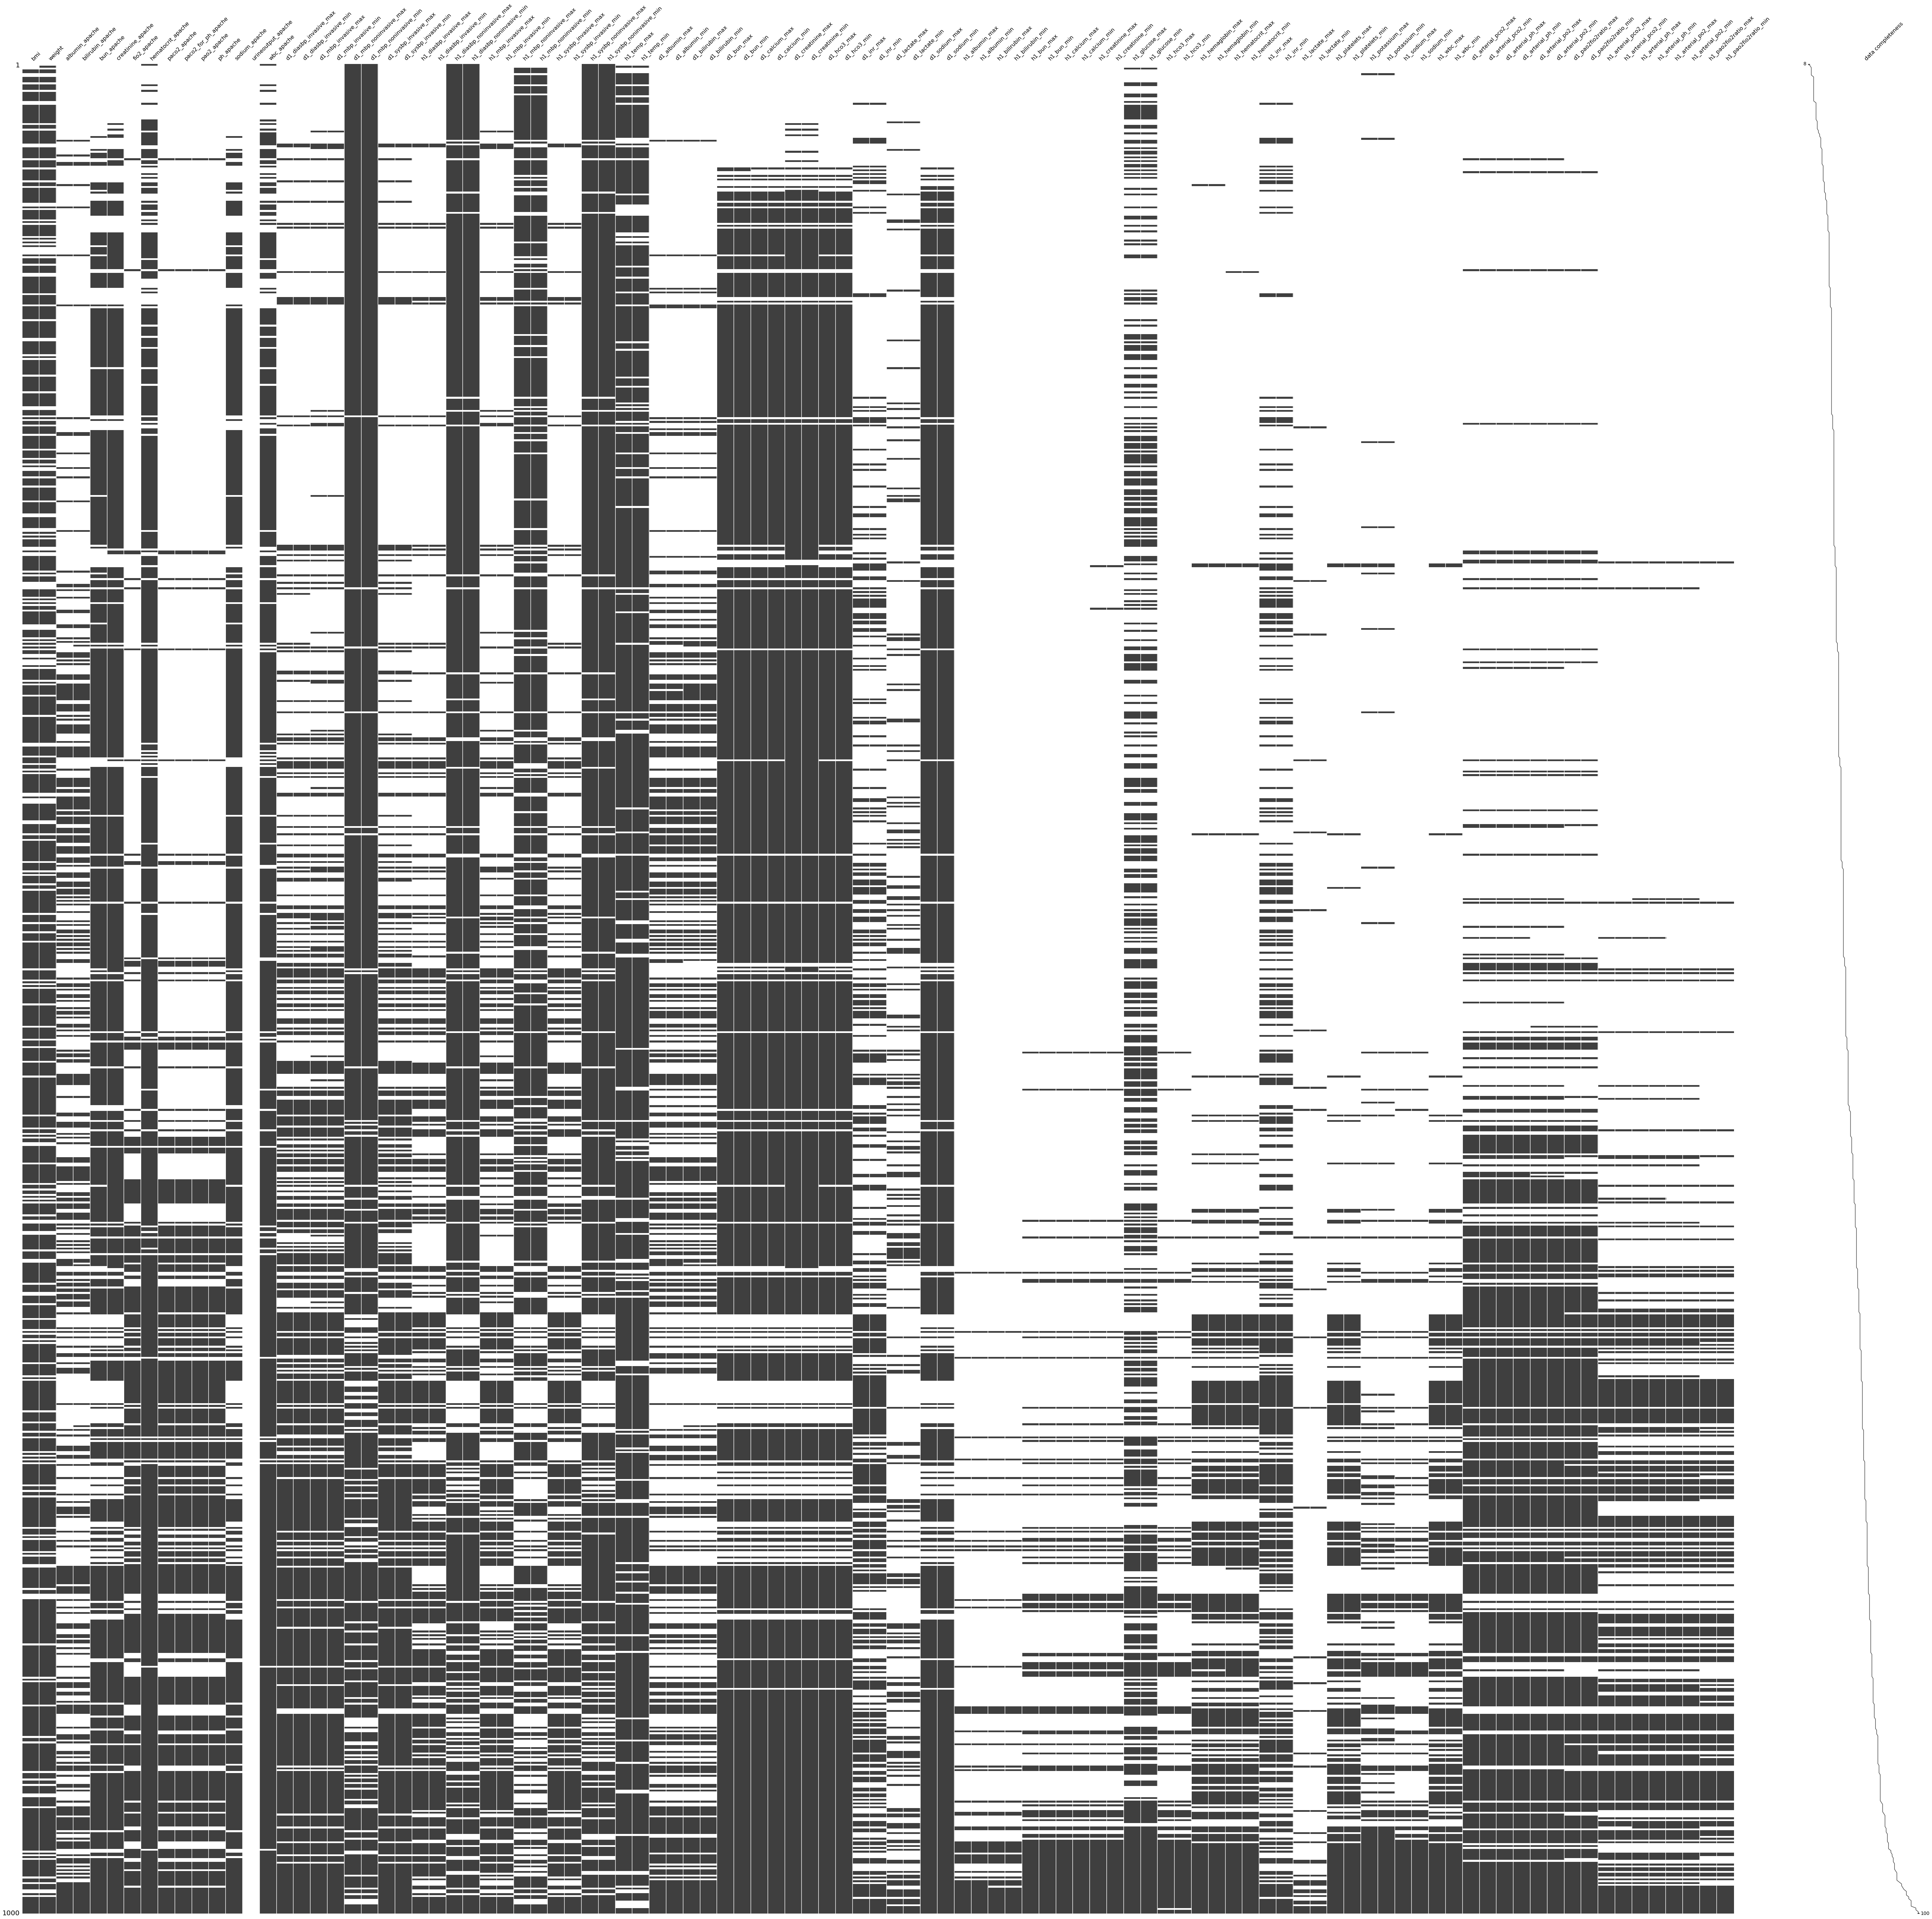

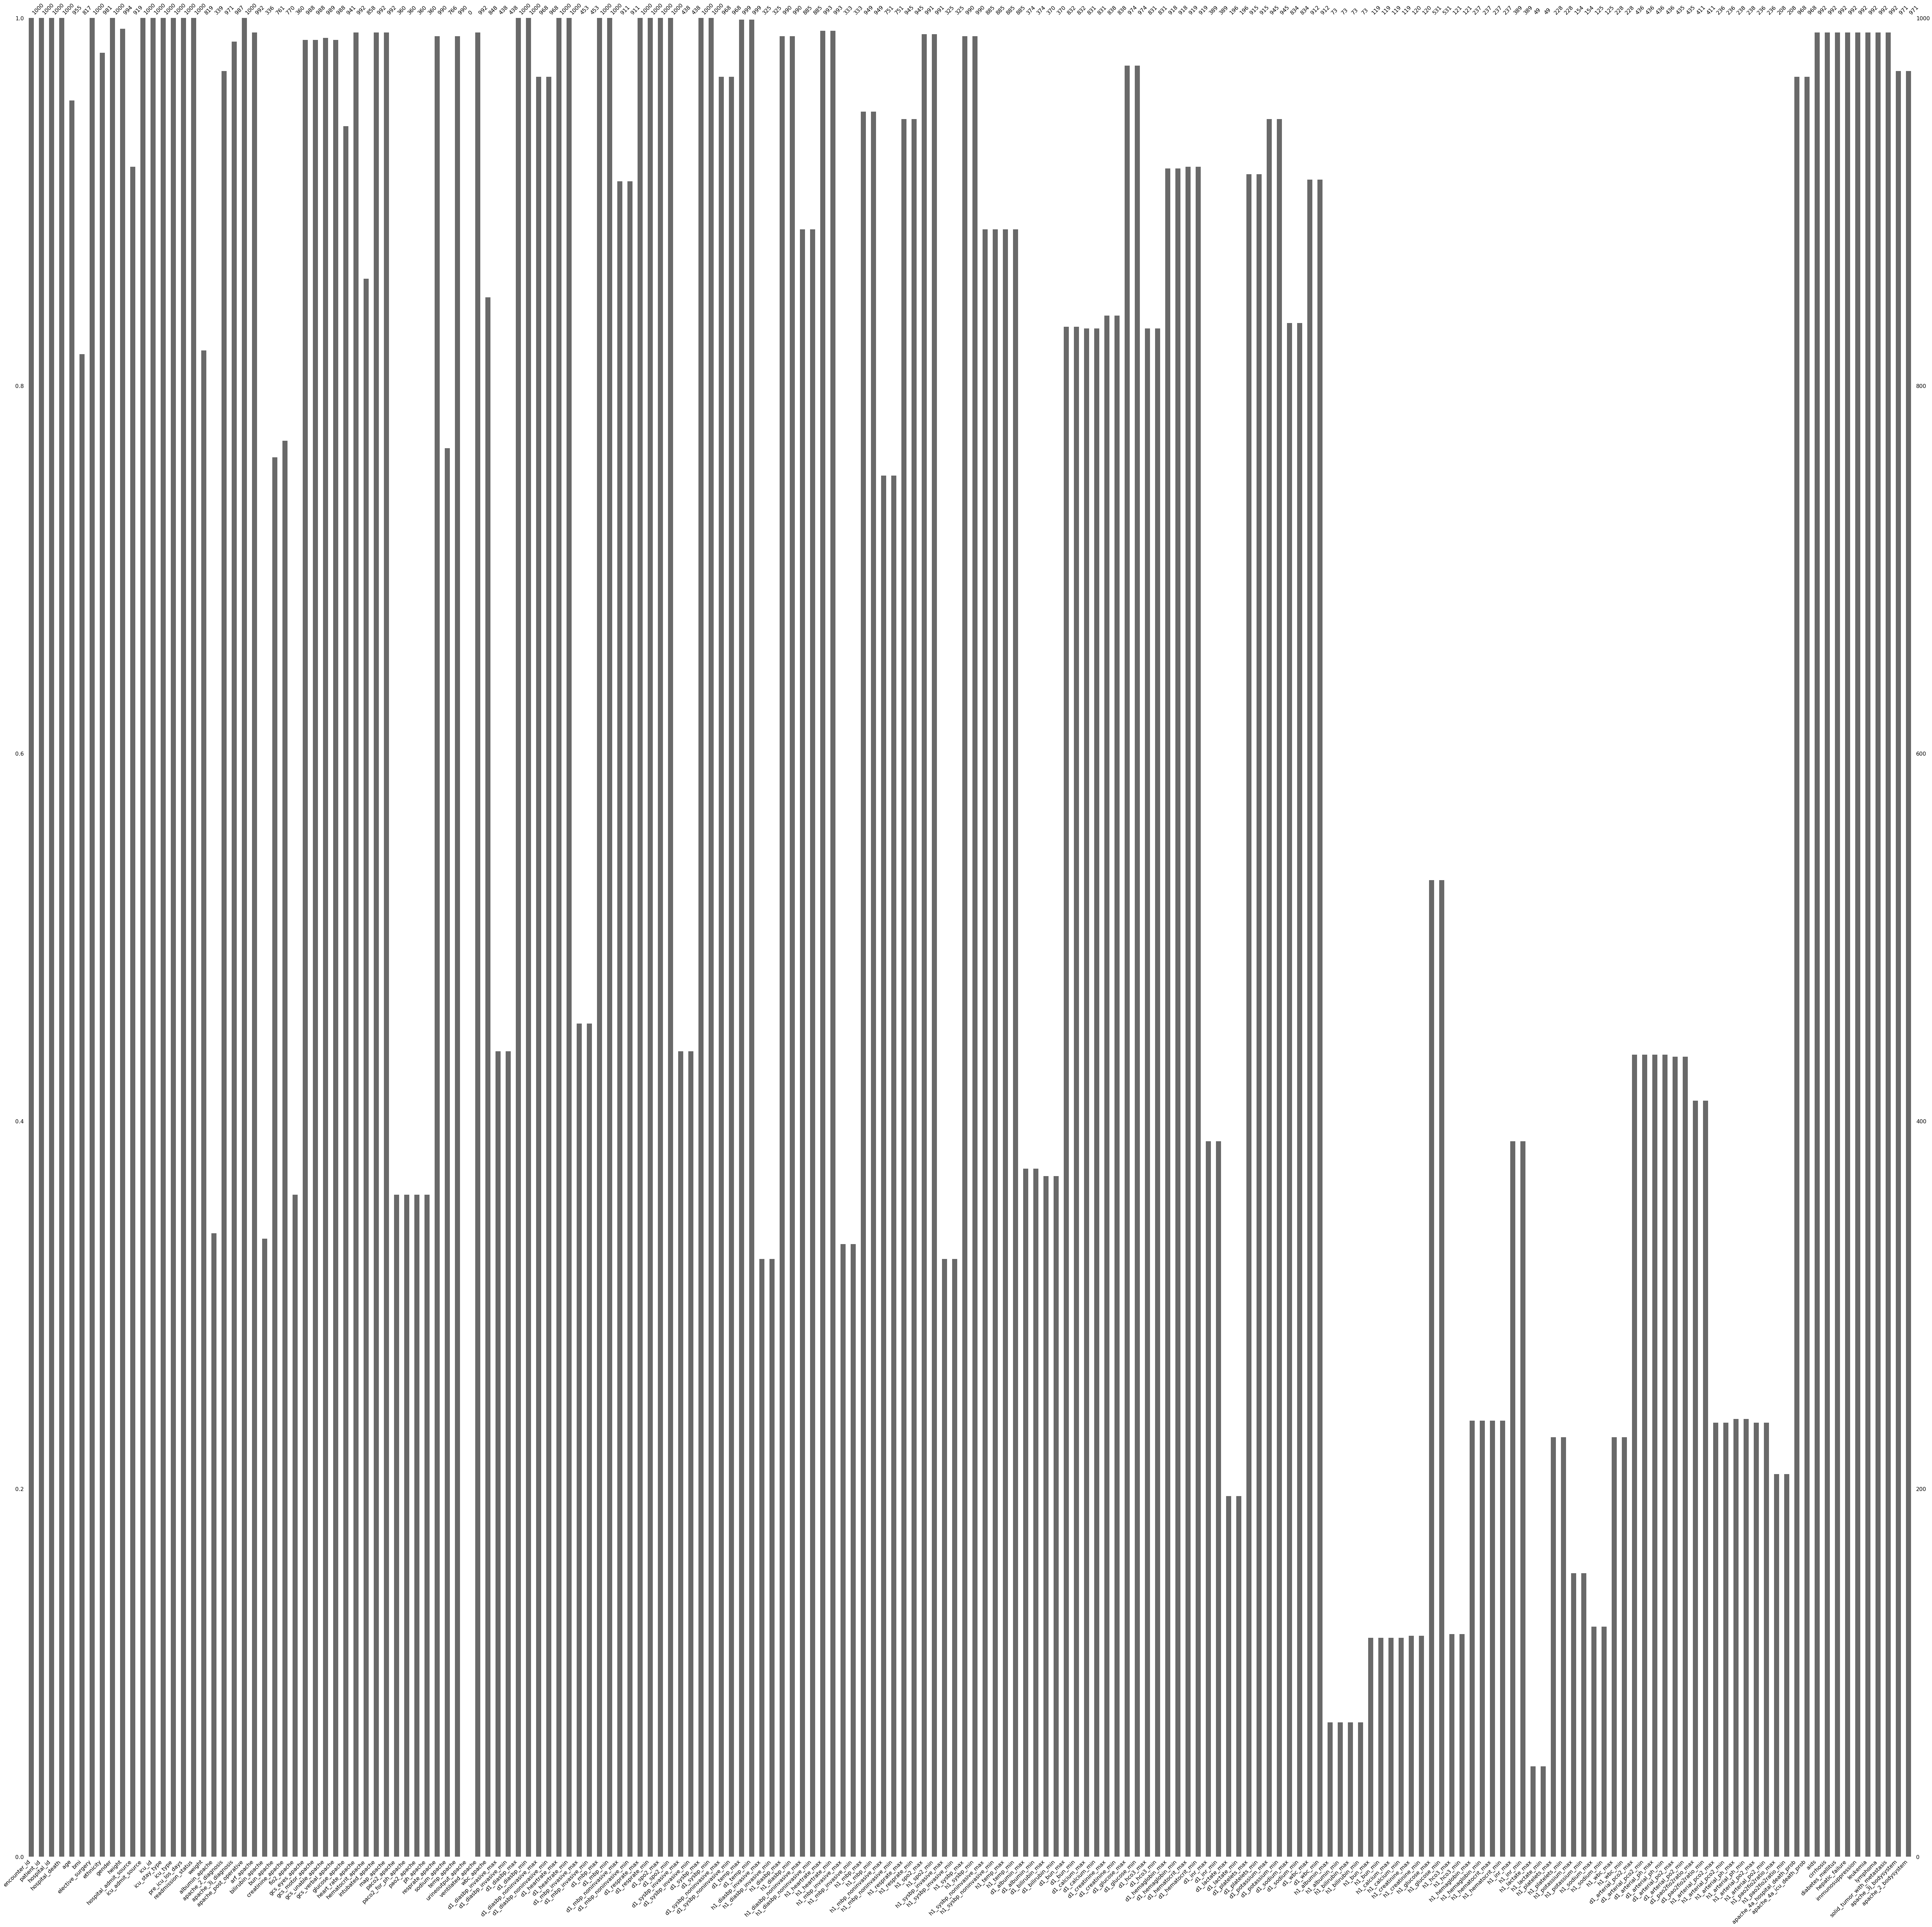

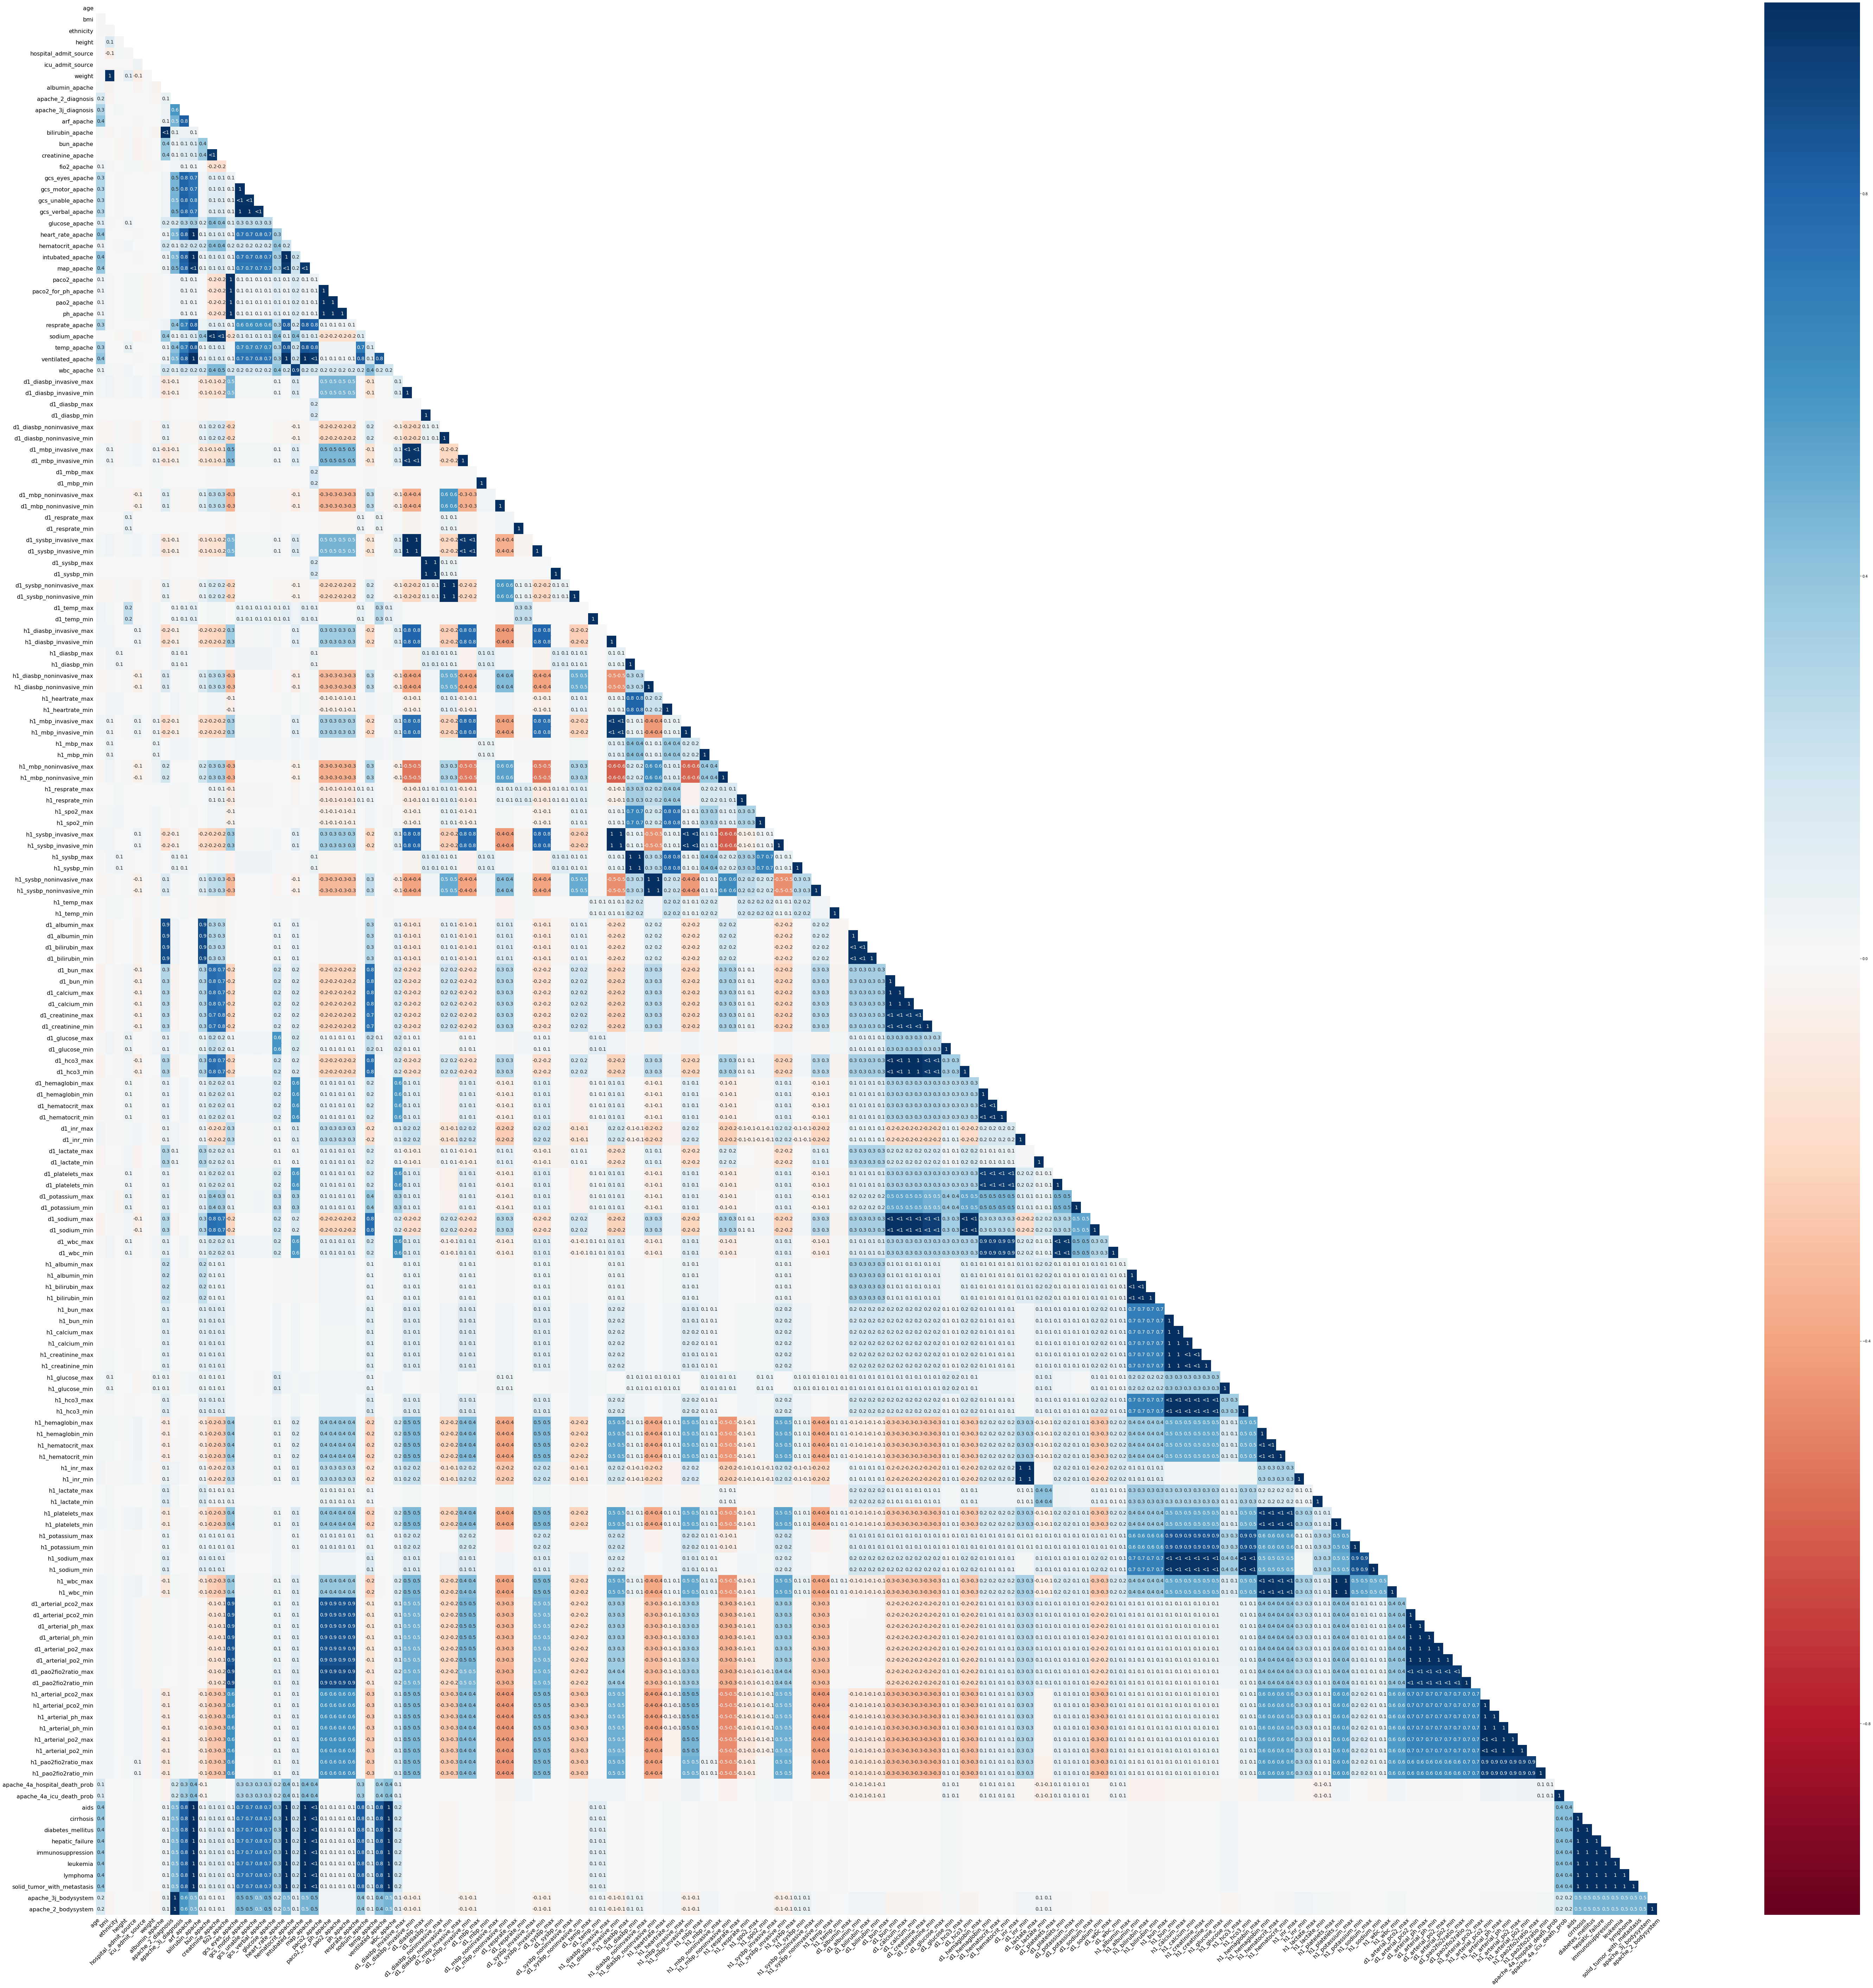

In [109]:
for hospital_id in train['hospital_id'].unique():
    print(f'plotting msno for {hospital_id}')
    subset = train[train['hospital_id'] == hospital_id]
    msno.matrix(subset.sample(min(1000, len(subset))), figsize=(100, 100), sort='ascending', labels=True)
    plt.show()
    msno.bar(subset.sample(min(1000, len(subset))), figsize=(100, 100), labels=True)
    plt.show()
    msno.heatmap(subset, figsize=(100, 100), labels=True)
    plt.show()
    break

## Look At Strings

In [112]:
train_cat_cols = [x for x in categorical_cols if x in train.columns]
train[train_cat_cols].head()

,bmi,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_2_diagnosis,apache_3j_diagnosis,apache_3j_bodysystem,apache_2_bodysystem
0,22.73,Caucasian,M,Floor,Floor,admit,CTICU,113.0,502.01,Sepsis,Cardiovascular
1,27.42,Caucasian,F,Floor,Floor,admit,Med-Surg ICU,108.0,203.01,Respiratory,Respiratory
2,31.95,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,122.0,703.03,Metabolic,Metabolic
3,22.64,Caucasian,F,Operating Room,Operating Room / Recovery,admit,CTICU,203.0,1206.03,Cardiovascular,Cardiovascular
4,NaN,Caucasian,M,NaN,Accident & Emergency,admit,Med-Surg ICU,119.0,601.01,Trauma,Trauma


In [113]:
import numpy as np
cat_features_ids = np.where(train[train_cat_cols].apply(pd.Series.nunique) < 30000)[0].tolist()

In [115]:
cat_features_ids

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [125]:
#train.iloc[:, np.where(train[train_cat_cols].apply(pd.Series.nunique) > 100)[0].tolist()]

In [126]:
for col in train_cat_cols:
    print(f'{col} has nuniq {train[col].nunique()}')

bmi has nuniq 34888
ethnicity has nuniq 6
gender has nuniq 2
hospital_admit_source has nuniq 15
icu_admit_source has nuniq 5
icu_stay_type has nuniq 3
icu_type has nuniq 8
apache_2_diagnosis has nuniq 44
apache_3j_diagnosis has nuniq 399
apache_3j_bodysystem has nuniq 11
apache_2_bodysystem has nuniq 10


In [131]:
# apache_2_diagnosis has nuniq 44
# apache_3j_diagnosis has nuniq 399
# bmi has nuniq 34888
bad_cats = ['bmi', 'apache_2_diagnosis', 'apache_3j_diagnosis']
good_cats = [x for x in train_cat_cols if x not in bad_cats]
for col in good_cats:
        print(f'{col} has nuniq {train[col].unique()}')

ethnicity has nuniq ['Caucasian' nan 'Hispanic' 'African American' 'Asian' 'Native American'
 'Other/Unknown']
gender has nuniq ['M' 'F' nan]
hospital_admit_source has nuniq ['Floor' 'Emergency Department' 'Operating Room' nan 'Direct Admit'
 'Other Hospital' 'Other ICU' 'ICU to SDU' 'Recovery Room'
 'Chest Pain Center' 'Step-Down Unit (SDU)' 'Acute Care/Floor' 'PACU'
 'Observation' 'ICU' 'Other']
icu_admit_source has nuniq ['Floor' 'Accident & Emergency' 'Operating Room / Recovery'
 'Other Hospital' 'Other ICU' nan]
icu_stay_type has nuniq ['admit' 'readmit' 'transfer']
icu_type has nuniq ['CTICU' 'Med-Surg ICU' 'CCU-CTICU' 'Neuro ICU' 'MICU' 'SICU'
 'Cardiac ICU' 'CSICU']
apache_3j_bodysystem has nuniq ['Sepsis' 'Respiratory' 'Metabolic' 'Cardiovascular' 'Trauma'
 'Neurological' 'Gastrointestinal' 'Genitourinary' nan 'Hematological'
 'Musculoskeletal/Skin' 'Gynecological']
apache_2_bodysystem has nuniq ['Cardiovascular' 'Respiratory' 'Metabolic' 'Trauma' 'Neurologic'
 'Gastrointestin

#### Deal with Proper Cats

- ethnicity can be mapped to unk
- gender to unk
- `hospital_admit_source` The location of the patient prior to being admitted to the hospital
    - Floor -> nan/direct admit?
    - ICU to SDU -> Step-Down Unit (SDU)
    - Other ICU -> ICU
    - PASU -> common with Recovery Room?
    - relapase category?
- `icu_type`
    - Cardiac ICU and 'CCU-CTICU', CTICU, CSICU
    - MICU and 'Med-Surg ICU
    - MICU and 'Med-Surg ICU and ICU?
    - SICU, 'Med-Surg ICU` 
- `apache_2_bodysystem`
    - 'Undefined diagnoses' and 'Undefined Diagnoses'

#### Deal with Continuous Cats

In [133]:
train[bad_cats].head() # can be converted to floats

,bmi,apache_2_diagnosis,apache_3j_diagnosis
0,22.73,113.0,502.01
1,27.42,108.0,203.01
2,31.95,122.0,703.03
3,22.64,203.0,1206.03
4,NaN,119.0,601.01


## Looking at Test Data

### Encounter ID

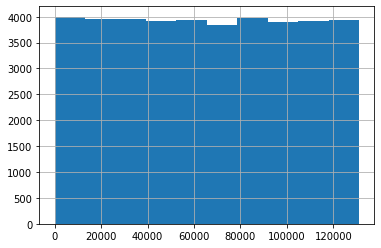

In [45]:
unlabeled['encounter_id'].hist()

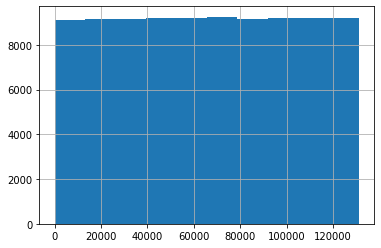

In [48]:
train['encounter_id'].hist()

### Hospital ID

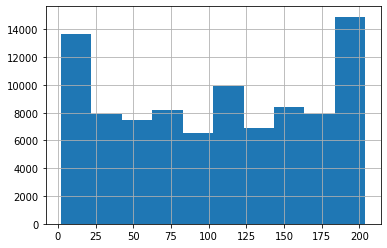

In [10]:
train['hospital_id'].hist()

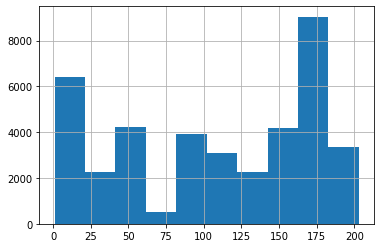

In [9]:
unlabeled['hospital_id'].hist()

### Icu ID

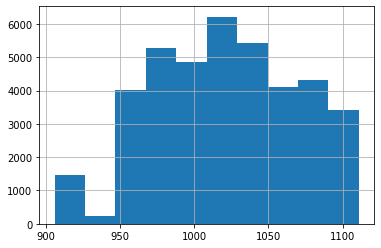

In [11]:
unlabeled['icu_id'].hist()

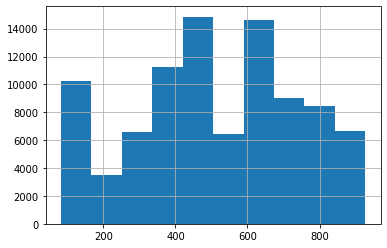

In [12]:
train['icu_id'].hist()

### Ethnicity

In [35]:
unlabeled['ethnicity'].value_counts()

Caucasian           30240
African American     4471
Other/Unknown        1921
Hispanic             1291
Asian                1080
Native American       134
Name: ethnicity, dtype: int64

In [37]:
train['ethnicity'].value_counts()

Caucasian           70684
African American     9547
Other/Unknown        4374
Hispanic             3796
Asian                1129
Native American       788
Name: ethnicity, dtype: int64

### Weight

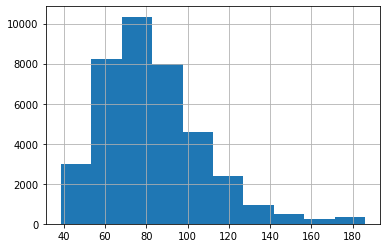

In [43]:
unlabeled['weight'].hist()

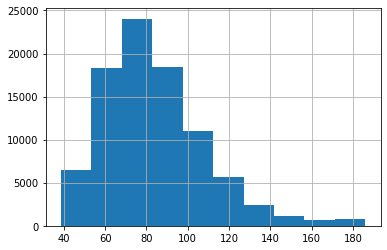

In [44]:
train['weight'].hist()

- Everyone is __really__ light.

## Age

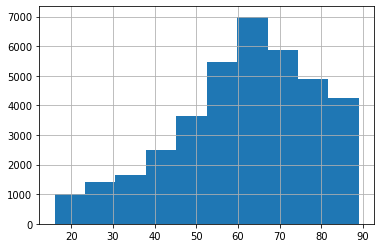

In [31]:
unlabeled['age'].hist()

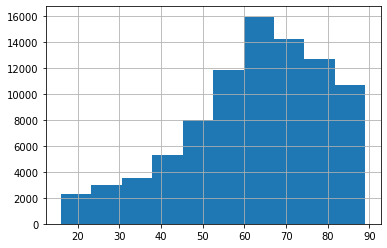

In [30]:
train['age'].hist()

### Height

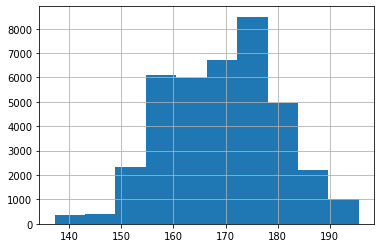

In [32]:
unlabeled['height'].hist()

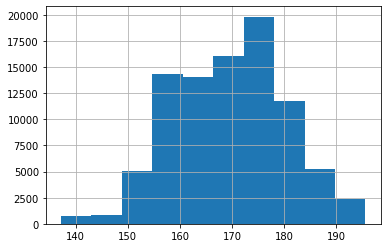

In [33]:
train['height'].hist()

## Gender

In [15]:
unlabeled['gender'].value_counts()

M    21512
F    17781
Name: gender, dtype: int64

In [16]:
train['gender'].value_counts()

M    49469
F    42219
Name: gender, dtype: int64

### Death Proba

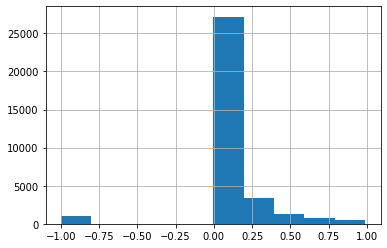

In [23]:
unlabeled['apache_4a_hospital_death_prob'].hist()

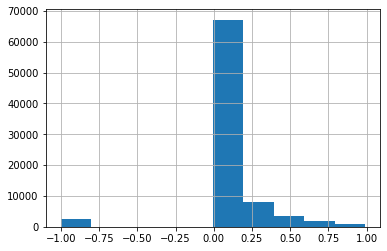

In [24]:
train['apache_4a_hospital_death_prob'].hist()

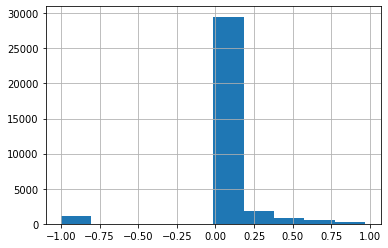

In [25]:
unlabeled['apache_4a_icu_death_prob'].hist()

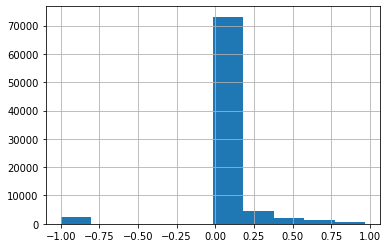

In [26]:
train['apache_4a_icu_death_prob'].hist()

### Elective Surgery

In [20]:
unlabeled['elective_surgery'].value_counts()

0    31450
1     7858
Name: elective_surgery, dtype: int64

In [21]:
train['elective_surgery'].value_counts()

0    74862
1    16851
Name: elective_surgery, dtype: int64

## Dump All Cols

In [6]:
list(train.columns)

['encounter_id',
 'patient_id',
 'hospital_id',
 'hospital_death',
 'age',
 'bmi',
 'elective_surgery',
 'ethnicity',
 'gender',
 'height',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_id',
 'icu_stay_type',
 'icu_type',
 'pre_icu_los_days',
 'readmission_status',
 'weight',
 'albumin_apache',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bilirubin_apache',
 'bun_apache',
 'creatinine_apache',
 'fio2_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'urineoutput_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_m